<a href="https://colab.research.google.com/github/mriduldeka/MachineLearning/blob/main/AML_CT2_MPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

### 20PAIC53J- MACHINE LEARNING AND SUPERVISED CLASSIFICATION

Read the “data” dataset to perform the following

In [1]:
# importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### 1. Data Understanding (5 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What do you understand from the dataset? (1 MARK)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


b. Calculate five-point summary for numerical variables (1 MARK)

In [4]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)


In [5]:
# no. of categories
catogory_list = data.select_dtypes(include=object).columns
print("Categories List:",catogory_list)
print("no. of categories:",catogory_list.array.size)
print("---%observations for diagnosis---")
data["diagnosis"].value_counts()

Categories List: Index(['diagnosis'], dtype='object')
no. of categories: 1
---%observations for diagnosis---


B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

d. Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (2 marks)


In [7]:
#Standard missing values
missing_values = data.isnull().sum()[data.isnull().sum()>0]
missing_values

radius_mean     7
radius_se      11
dtype: int64

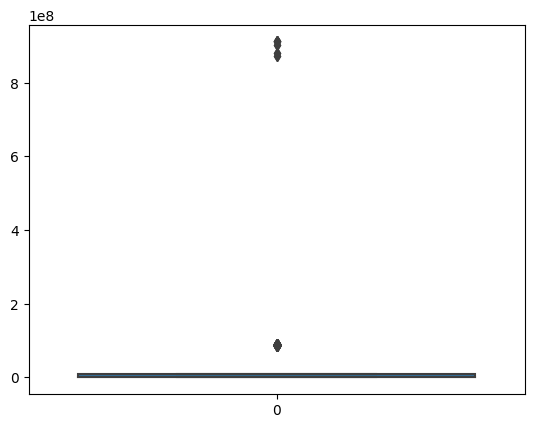

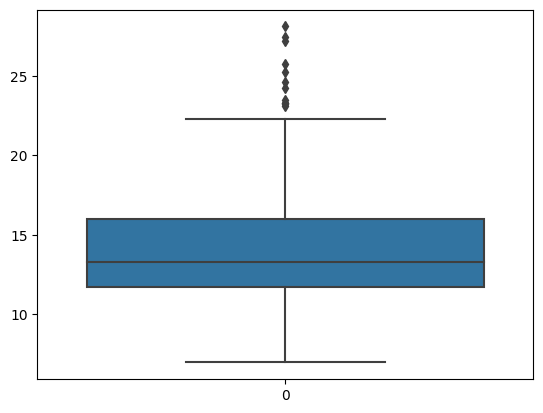

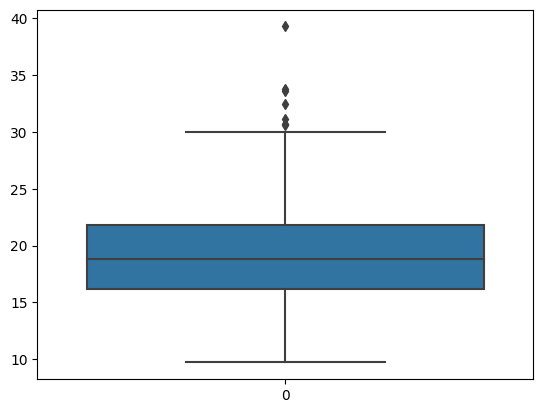

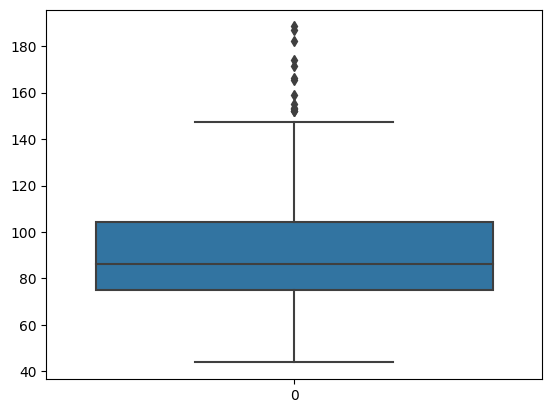

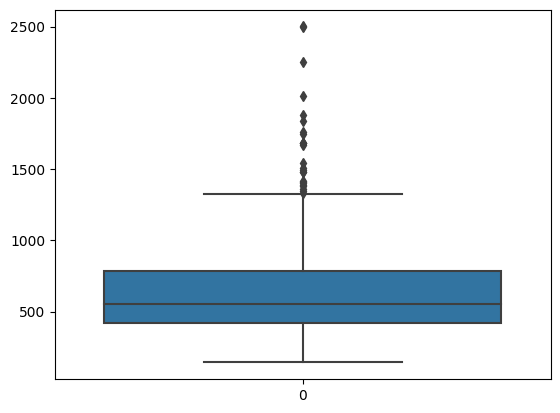

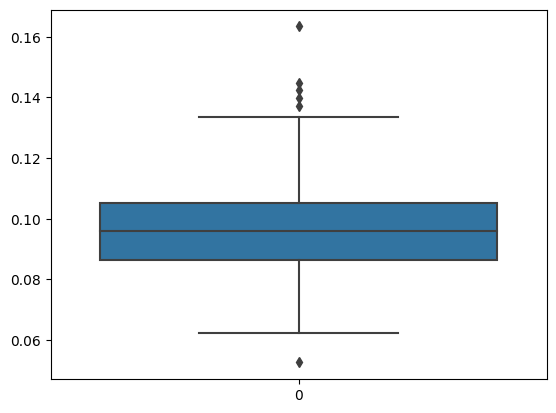

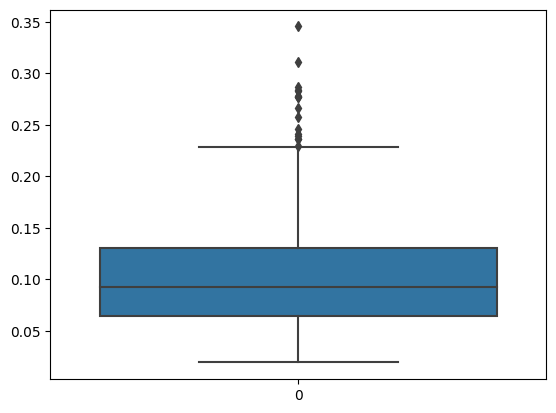

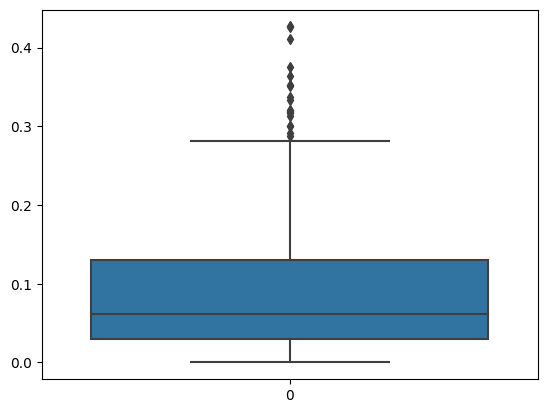

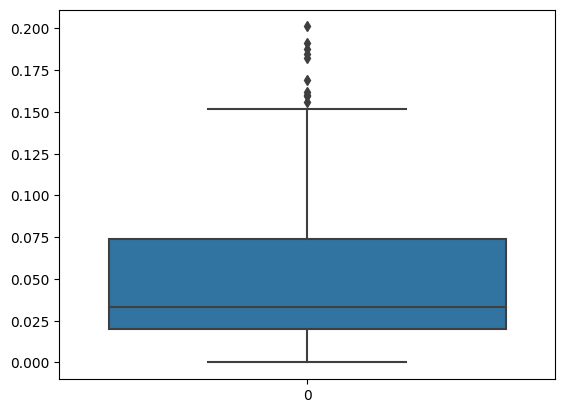

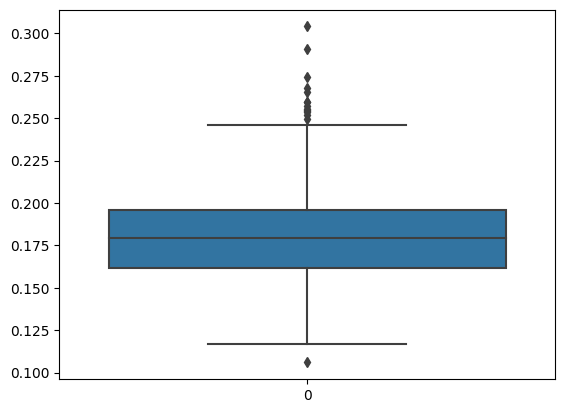

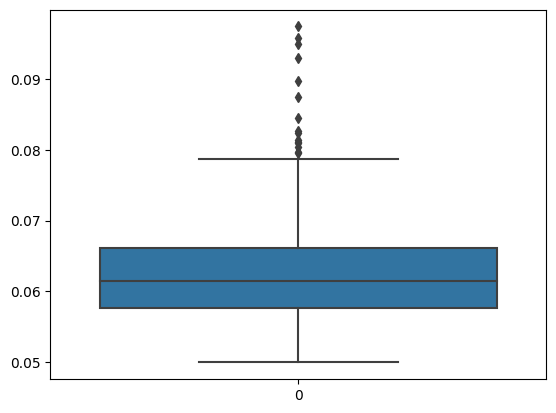

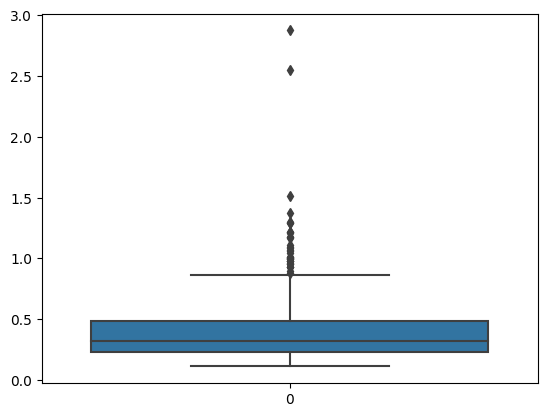

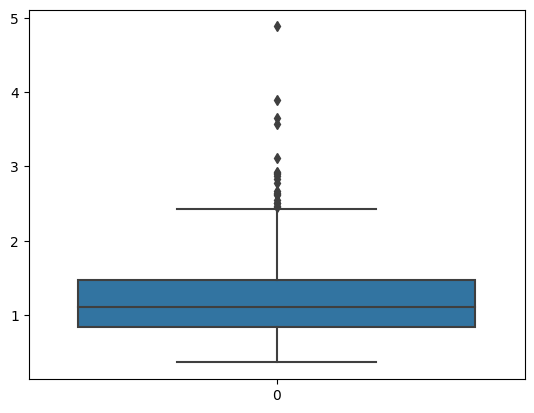

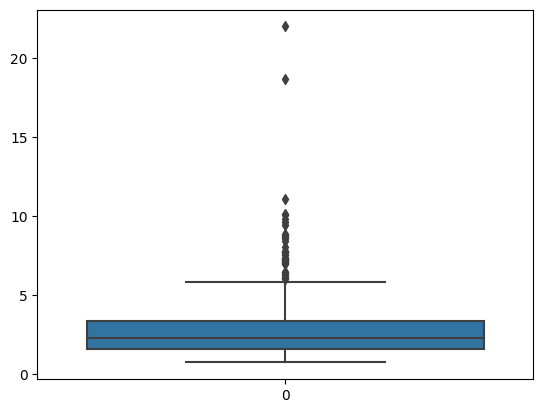

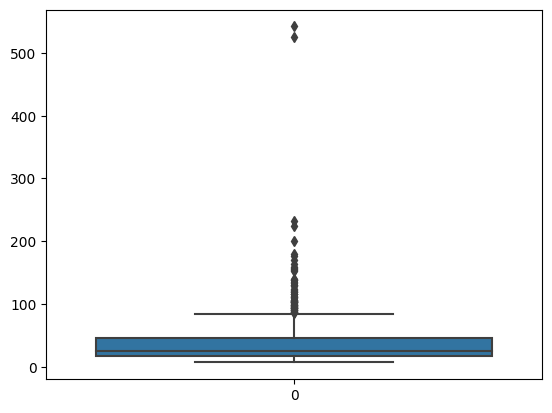

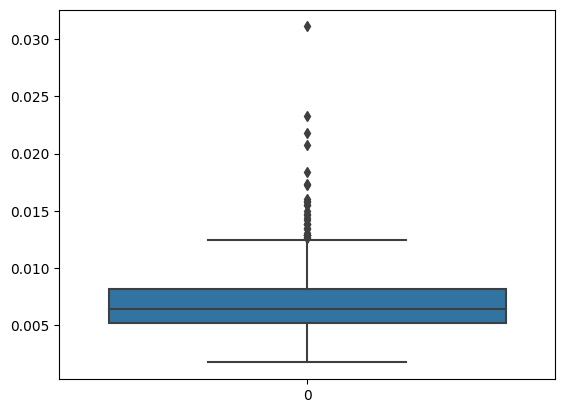

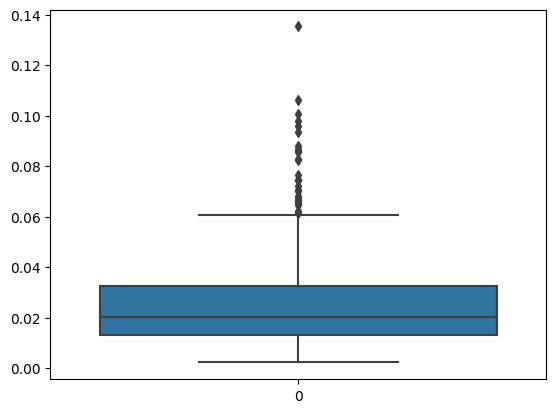

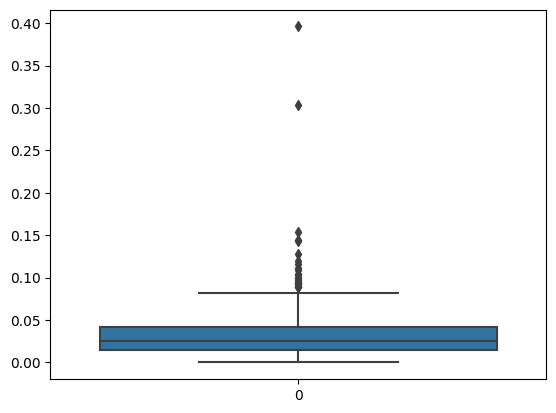

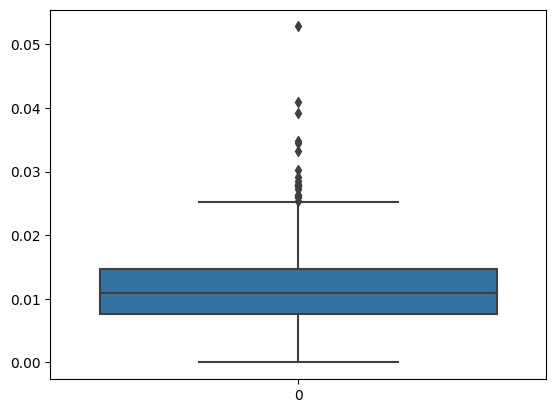

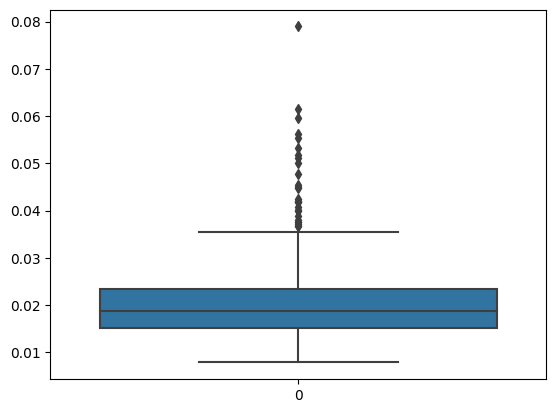

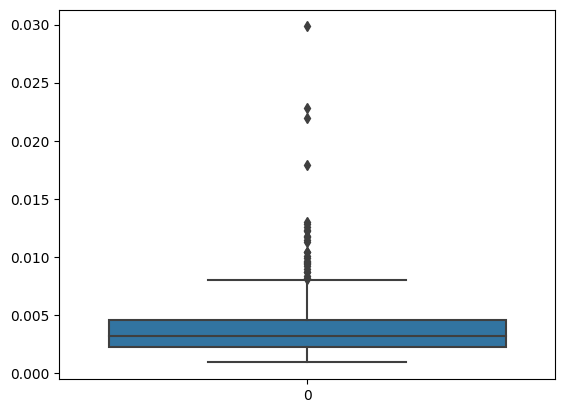

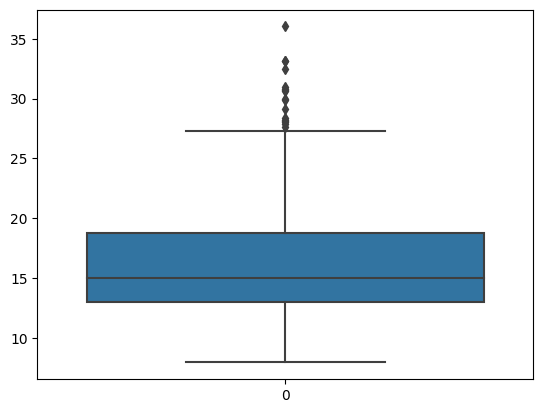

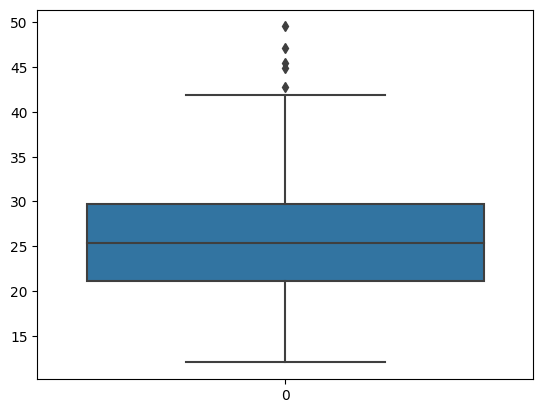

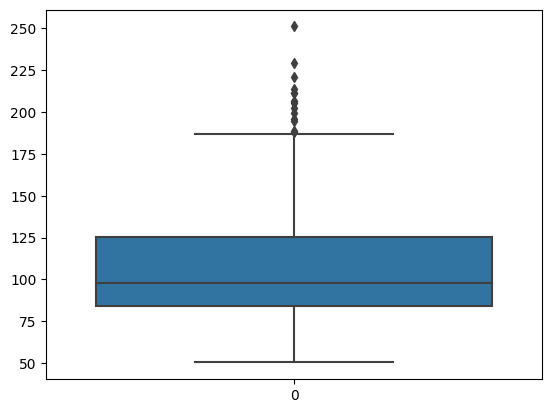

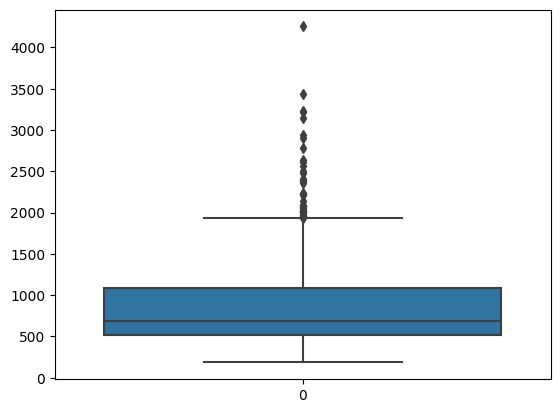

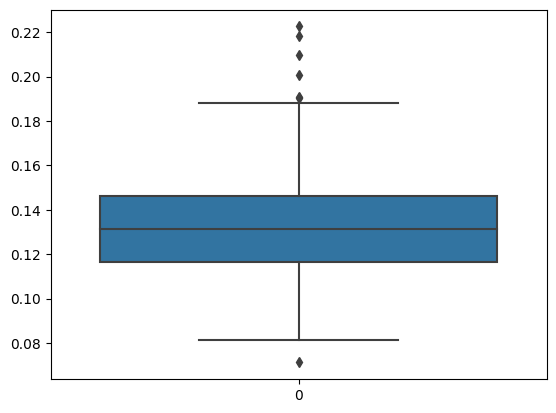

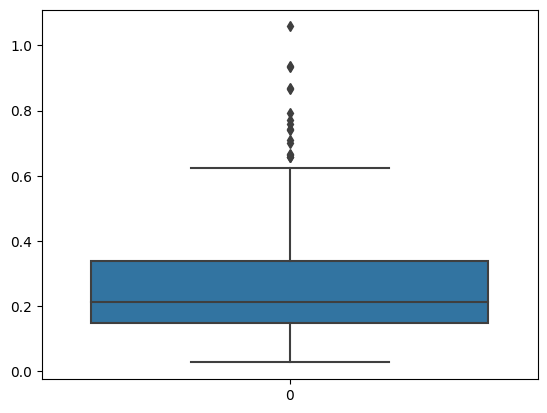

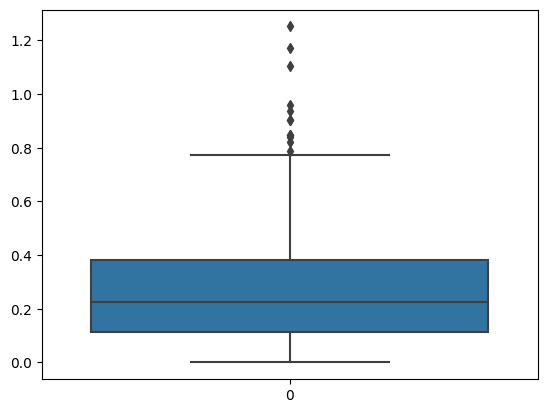

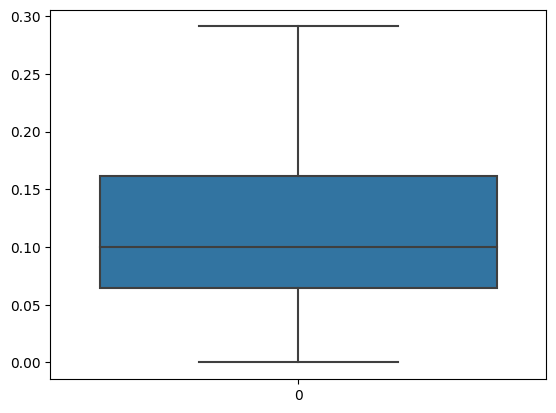

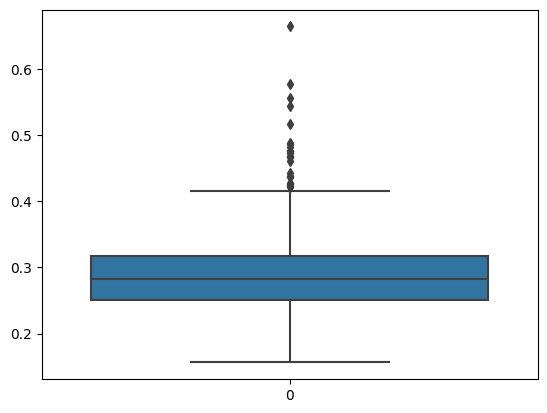

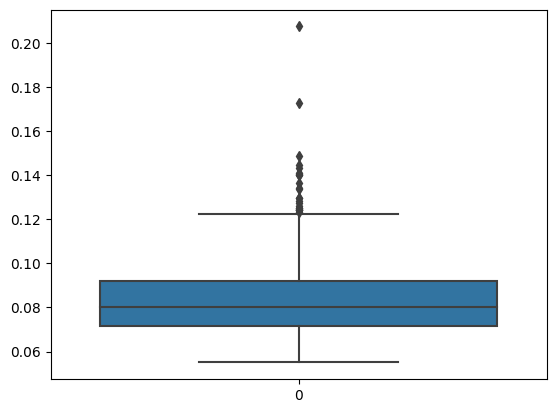

In [8]:
#Outliers
data_num = data.select_dtypes(include=np.number)
for i in data_num.columns:
  sns.boxplot(data_num[i])
  plt.show()

In [9]:
# check for class inbalance
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

###  2.  Data Preparation (15 marks)


a. Fix the defects if any and do appropriate treatment if any. (4 marks)

In [10]:
#replace missing values by mean
avg_radius_mean = data['radius_mean'].astype('float').mean()
data['radius_mean'].replace(np.nan,avg_radius_mean,inplace=True)

avg_radius_se = data['radius_se'].astype('float').mean()
data['radius_se'].replace(np.nan,avg_radius_mean,inplace=True)

b. Visualize the data using relevant plots and explain the idea behind your choice of plot. Find out the variables which are highly correlated with Target? (4 marks)

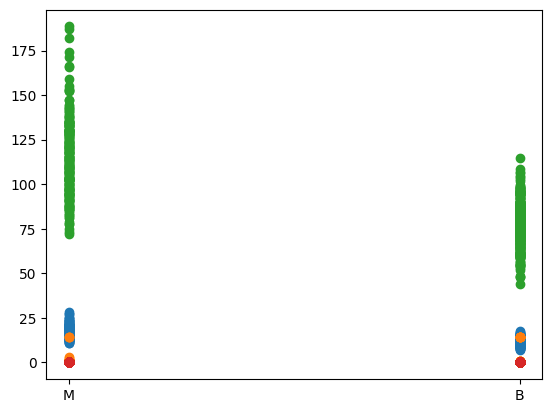

In [11]:
plt.scatter(data['diagnosis'], data['radius_mean'])
plt.scatter(data['diagnosis'], data['radius_se'])
plt.scatter(data['diagnosis'], data['perimeter_mean'])
plt.scatter(data['diagnosis'], data['concavity_mean'])

In [ ]:
# Scatter plot is used tovisualize data due to following reasons:
# Displays correlation between variables
# Suitable for large data sets
# Easier to find data clusters
# Better representation of each data point

In [ ]:
# variables highly correlated with Target 'diagnosis' are:
   # radius_mean
   # radius_se
   # perimeter_mean
   # concavity_mean

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? Tell us the reason behind your choice of action.(4 marks)

In [ ]:
# 'id' column can be drop as it has no relation with target variable

In [13]:
# drop by Name
data1 = data.drop(['id'], axis=1)
data1.shape

(569, 31)


d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [16]:
inp = data1.drop(['diagnosis'], axis=1)
out = data1['diagnosis']
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size=0.3,random_state=48)

In [17]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(398, 30) (171, 30) (398,) (171,)


In [ ]:
# We can see that out of total 569 data , 398 data (70 percent) were allocated to the training set and 
# 171 data (30 percent) were allocated to the test set, as we specified.

### 3. Model Building (20 marks)

a. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set (4 marks)


In [18]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

 b. What is the overall Accuracy? Please comment on it (3 mark)

In [19]:
#test data performance
ypred = dt.predict(xtest)
ypredtr = dt.predict(xtrain)
print('Train data',accuracy_score(ytrain,ypredtr))
print('Test data',accuracy_score(ytest,ypred))

Train data 1.0
Test data 0.9005847953216374


c. Evaluate the model built using Precision, Recall and F1 Score and interpret the results with inferences (4 marks)


In [22]:
ypredTest=dt.predict(xtest)
cm = confusion_matrix(ytest,ypredTest)
print(cm)
accuracyScore = accuracy_score(ytest,ypredTest)
#f1_score = f1_score(ytest, ypredTest, average='binary')
print('accuracy_score',accuracyScore)
#print('f1_score',f1_score)


[[84 11]
 [ 6 70]]


TypeError: ignored

d. Build a logistic regression model and compare the performance of the same with decision tree. What are your inferences?